2 principal components can not seperate all digits


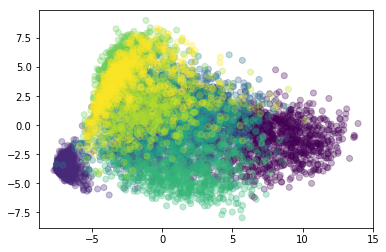

In [4]:
# Using numpy library for data importation
import numpy as np

# Assign the filename: file
path = 'C:/Users/User/Desktop/data/'
file = path + 'ziptrain.csv'

# Read the file into a numpy array: data
data = np.loadtxt(file)

# Project ziptrain onto two principal components

# Project the resulting data set on 2 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data[:,1:])
Z_all= pca.transform(data[:,1:])

# Classifying the digits in order is not necessary but generates a nicer scatter plot (IMHO).

# Selecting digit 0 to 9 from the dataset by selecting every row with a given digit in the first column and then combining all into a single data set
data0 = data[data[:,0]==0]
data1 = data[data[:,0]==1]
data2 = data[data[:,0]==2]
data3 = data[data[:,0]==3]
data4 = data[data[:,0]==4]
data5 = data[data[:,0]==5]
data6 = data[data[:,0]==6]
data7 = data[data[:,0]==7]
data8 = data[data[:,0]==8]
data9 = data[data[:,0]==9]
data09 = np.vstack([data0,data1,data2,data3,data4,data5,data6,data7,data8,data9])

# Project the resulting data set on 2 principal components
pca.fit(data09[:,1:])
Z09= pca.transform(data09[:,1:])

# Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Z09[:,0], Z09[:,1], c = data09[:,0], alpha=0.3);

# 2 principal components can't seperate all digits
print('2 principal components can not seperate all digits')

In [5]:
# Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain

# Define the response as the digit in the first column of the data set and the predictor as the 256 next columns
y = data[:,0]
X = data[:,1:257]

#import the linear discriminant model from the Scikit-learn library and run the regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

# We now apply our predictive model on the test the pixel data (X) 
y_pred = lda.predict(X)

# Now that we have both sets (y and y_pred), we can now run the confusion matirx on the two:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[1167    0    1    3    4    2   10    0    7    0]
 [   0 1001    1    0    0    0    0    0    1    2]
 [   3    1  657   21   14    3    7    4   18    3]
 [   3    0    3  618    0   10    0    6   15    3]
 [   1   16    9    0  592    1    4    0    6   23]
 [   8    0    2   17    7  507    4    0    9    2]
 [   4    6    4    0   10    6  626    0    8    0]
 [   0    1    0    1   11    1    0  588    2   41]
 [   6    2    2   23   14    9    4    2  477    3]
 [   0    2    0    2   19    0    0   13    2  606]]


157
157
Classification of all digits is the most precise on ziptest for m = 158 principal components according to both the confusion matrix and accuracy score tests, but the performance of classification is not as good as on the set of 2 digits 2 & 7 (which had higher accuracy ratios and correct identification relative to test sample).


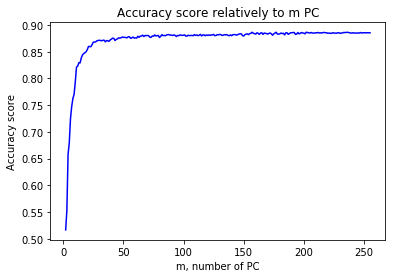

166


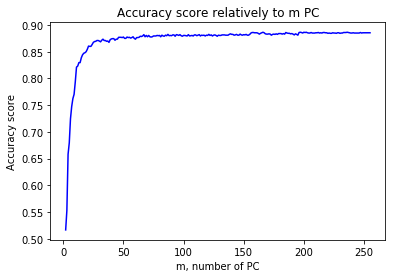

In [9]:

# Use linear disciminant over "m" projected principal components, with the appropriate choice of m (where the precision of prediction maximizes over ziptest data set).

# Assign the filename: filetest
filetest = path + 'ziptest.csv'

# Read the file into a numpy array: datatest
datatest = np.loadtxt(filetest)

# We'll build a graph of total correct identification from the confusion matrix relatively to m, the number of PC used. Same thing for the accuracy score.
from sklearn.metrics import accuracy_score

# Declaring empty arrays to stock values over a for loop to get the optimal number of PC, see in the for loop comments for more details 
paths_m = []
paths_cm = []
paths_as = []
y_test = datatest[:,0]

for m in range(2,256,1):
	# Project the data set on m principal components
	pca = PCA(n_components=m)
	pca.fit(data[:,1:])
	Z= pca.transform(data[:,1:])

	# Run the linear discriminant analysis of Z (the principal components on y (vector containing the digits))
	lda.fit(Z, y)

	# Project the test data set on m principal components
	Ztest= pca.transform(datatest[:,1:])

	# We now apply our predictive model on the test principal components (Ztest) 
	y_test_pred = lda.predict(Ztest)

	# Now that we have both sets (y_test and y_test_pred), we can now run the confusion matrix and accuracy score on the two:
	cm = confusion_matrix(y_test, y_test_pred)
	a_s = accuracy_score(y_test, y_test_pred)


	# To asses the quality of the PCA porjection, we'll add the correct identifications by summing the diagonal of the confusion matrix and stock the resulst in an array paths_cm, at the same time we stock the associate m value in another array path_m
	# Both array are declared as empty arrays before beginning the for loop
	# Using the numpy sum function and diagonal method
	paths_m.append(m)
	paths_cm.append(np.sum(cm.diagonal()))
	paths_as.append(a_s)

#print the graph showing accuracy score following 'm' PC
plt.plot(paths_m, paths_as, '-b')
plt.xlabel('m, number of PC')
plt.ylabel('Accuracy score')
plt.title('Accuracy score relatively to m PC')

# Getting the position of the maximum accuracy score to tell what number of PC is optimal
print(np.argmax(paths_as)+2)